Importations

In [26]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

Préparation des données

In [23]:
# Récupération des données
arbre = pd.read_csv("Data_Arbre.csv")

# Encodage
OE = OrdinalEncoder()
LE = LabelEncoder()
arbre[['fk_stadedev']] = OE.fit_transform(arbre[['fk_stadedev']])
arbre['fk_nomtech'] = LE.fit_transform(arbre['fk_nomtech'])


# Sélection des données intéressantes pour l'étude
x = arbre[['haut_tronc', 'fk_stadedev', 'tronc_diam', 'haut_tot', 'fk_nomtech']].copy()
y = arbre[['age_estim']].copy()

# Normalisation
SC_x = StandardScaler()
SC_y = StandardScaler()
x_norm = SC_x.fit_transform(x)
y_norm = SC_y.fit_transform(y)

# Division de la base de données
indices = np.arange(arbre.shape[0])
x_train, x_test, y_train, y_test, indice_train, indice_test = train_test_split(x_norm, y_norm, indices, train_size=0.8, random_state=42)

# Création d'un fichier json pour les tests
arbre_test = pd.read_csv('Data_Arbre.csv')

data_test = arbre_test.iloc[indice_test]
data_test.to_json('Data_Test2.json')

# Reshape y_train and y_test
y_train = y_train.ravel()
y_test = y_test.ravel()

Random Forest

In [21]:
# Détermination des paramètres à tester pour le RandomForest
RF_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Création du modèle
RF = RandomForestRegressor()

# Utilisation de GridSearch pour déterminer les meilleurs paramètres à utiliser pour ce modèle
RF_GS = GridSearchCV(estimator=RF, param_grid=RF_param_grid, cv=3, n_jobs=1, verbose=2)

# Entraînement du GridSearch
RF_GS.fit(x_train, y_train)

# Récupération et affichage des meilleurs paramètres
RF_best_params = RF_GS.best_params_

# Récupération du meilleur estimateur et prédiction
best_RF = RF_GS.best_estimator_
RF_y_pred = best_RF.predict(x_test)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_es

In [22]:
RF_mse = mean_squared_error(y_test, RF_y_pred)
RF_r2 = r2_score(y_test, RF_y_pred)
print("RF Best parameters found: ", RF_best_params)
print(f"Random Forest -> Mean Squared Error: {RF_mse}, R^2 Score: {RF_r2}")

RF Best parameters found:  {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest -> Mean Squared Error: 0.18272753812714346, R^2 Score: 0.8169685202881388


CART

In [10]:
# Détermination des paramètres à tester pour CART
CART_param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40],
    'min_impurity_decrease': [0.0, 0.01, 0.1]
}

# Création du modèle
DTR = DecisionTreeRegressor()

# Utilisation de GridSearch pour déterminer les meilleurs paramètres à utiliser pour ce modèle
CART_GS = GridSearchCV(estimator=DTR, param_grid=CART_param_grid, cv=3, n_jobs=1, verbose=2)

# Entraînement GridSearch
CART_GS.fit(x_train, y_train)

# Récupération et affichage des meilleurs paramètres
CART_best_params = CART_GS.best_params_

# Récupération du meilleur estimateur et prédiction
best_CART = CART_GS.best_estimator_
CART_y_pred = best_CART.predict(x_test)


Fitting 3 folds for each of 12150 candidates, totalling 36450 fits
[CV] END criterion=squared_error, max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, split

In [11]:
CART_mse = mean_squared_error(y_test, CART_y_pred)
CART_r2 = r2_score(y_test, CART_y_pred)
print("CART Best parameters found: ", CART_best_params)
print(f"DecisionTreeRegression -> Mean Squared Error: {CART_mse}, R^2 Score: {CART_r2}")

CART Best parameters found:  {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
DecisionTreeRegression -> Mean Squared Error: 0.24444368192206645, R^2 Score: 0.7551497203597182


GradientBoostingRegressor

In [12]:
# Détermination des paramètres à tester pour GBR
GBR_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Création du modèle
GBR = GradientBoostingRegressor()

# Utilisation de GridSearch pour déterminer les meilleurs paramètres à utiliser pour ce modèle
GBR_GS = GridSearchCV(estimator=GBR, param_grid=GBR_param_grid, cv=3, n_jobs=1, verbose=2)

# Entraînement GridSearch
GBR_GS.fit(x_train, y_train)

# Récupération et affichage des meilleurs paramètres
GBR_best_params = GBR_GS.best_params_

# Récupération du meilleur estimateur et prédiction
best_GBR = GBR_GS.best_estimator_
GBR_y_pred = best_GBR.predict(x_test)


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=1.0; total time

In [13]:
GBR_mse = mean_squared_error(y_test, GBR_y_pred)
GBR_r2 = r2_score(y_test, GBR_y_pred)
print("GBR Best parameters found: ", GBR_best_params)
print(f"GradientBoostingRegressor -> Mean Squared Error: {GBR_mse}, R^2 Score: {GBR_r2}")

GBR Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.9}
GradientBoostingRegressor -> Mean Squared Error: 0.20077959458428732, R^2 Score: 0.7988864367715641


KNeighborsRegressor

In [14]:
# Détermination des paramètres à tester pour KNN
KNN_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50],
    'p': [1, 2]
}

# Création du modèle
KNN = KNeighborsRegressor()

# Utilisation de GridSearch pour déterminer les meilleurs paramètres à utiliser pour ce modèle
KNN_GS = GridSearchCV(estimator=KNN, param_grid=KNN_param_grid, cv=3, n_jobs=1, verbose=2)

# Entraînement GridSearch
KNN_GS.fit(x_train, y_train)

# Récupération et affichage des meilleurs paramètres
KNN_best_params = KNN_GS.best_params_

# Récupération du meilleur estimateur et prédiction
best_KNN = KNN_GS.best_estimator_
KNN_y_pred = best_KNN.predict(x_test)

Fitting 3 folds for each of 448 candidates, totalling 1344 fits
[CV] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=3, p=2, weights=distance; t

In [15]:
KNN_mse = mean_squared_error(y_test, KNN_y_pred)
KNN_r2 = r2_score(y_test, KNN_y_pred)
print("KNN Best parameters found: ", KNN_best_params)
print(f"KNeighborsRegressor -> Mean Squared Error: {KNN_mse}, R^2 Score: {KNN_r2}")

KNN Best parameters found:  {'algorithm': 'auto', 'leaf_size': 40, 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
KNeighborsRegressor -> Mean Squared Error: 0.2019454269953777, R^2 Score: 0.7977186651620685


Extra Trees Regressor

In [16]:
# Détermination des paramètres à tester pour ETR
ETR_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Création du modèle
ETR = ExtraTreesRegressor()

# Utilisation de GridSearch pour déterminer les meilleurs paramètres à utiliser pour ce modèle
ETR_GS = GridSearchCV(estimator=ETR, param_grid=ETR_param_grid, cv=3, n_jobs=1, verbose=2)

# Entraînement GridSearch
ETR_GS.fit(x_train, y_train)

# Récupération et affichage des meilleurs paramètres
ETR_best_params = ETR_GS.best_params_

# Récupération du meilleur estimateur et prédiction
best_ETR = ETR_GS.best_estimator_
ETR_y_pred = best_ETR.predict(x_test)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_es

In [24]:
ETR_mse = mean_squared_error(y_test, ETR_y_pred)
ETR_r2 = r2_score(y_test, ETR_y_pred)
print("ETR Best parameters found: ", ETR_best_params)
print(f"ExtraTreesRegressor -> Mean Squared Error: {ETR_mse}, R^2 Score: {ETR_r2}")

ETR Best parameters found:  {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
ExtraTreesRegressor -> Mean Squared Error: 0.17741518691670485, R^2 Score: 0.8222897078483802


Enregistrement des modèles

In [25]:
dict_pickle = {
    'ordinal' : OE,
    'label' : LE,
    'scaler_x' : SC_x,
    'scaler_y' : SC_y,
    'RandomForest': best_RF,
    'GradientBoostingRegression': best_GBR,
    'DecisionTreeRegressor' : best_CART,
    'KNeighborsRegressor' : best_KNN,
    'ExtraTreesRegressor' : best_ETR
    
}

with open('dict_pickle2', 'wb') as f:
    pickle.dump(dict_pickle, f)

Graphiques métriques

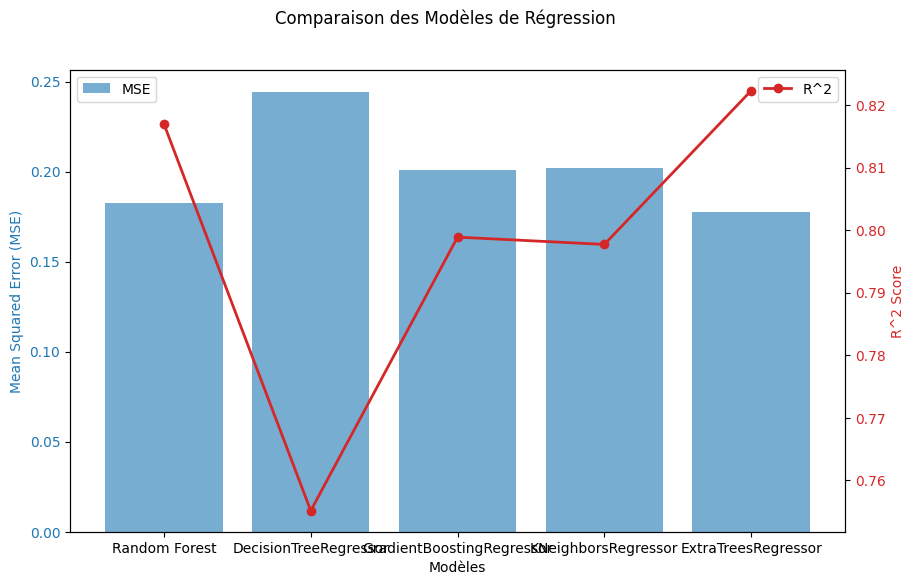

In [27]:
# Les résultats des modèles
model_results = {
    'Random Forest': {'MSE': 0.18272753812714346, 'R2': 0.8169685202881388},
    'DecisionTreeRegressor': {'MSE': 0.24444368192206645, 'R2': 0.7551497203597182},
    'GradientBoostingRegressor': {'MSE': 0.20077959458428732, 'R2': 0.7988864367715641},
    'KNeighborsRegressor': {'MSE': 0.2019454269953777, 'R2': 0.7977186651620685},
    'ExtraTreesRegressor': {'MSE': 0.17741518691670485, 'R2': 0.8222897078483802}
}

# Extraire les données
models = list(model_results.keys())
mse_values = [model_results[model]['MSE'] for model in models]
r2_values = [model_results[model]['R2'] for model in models]

# Créer les graphiques
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graphique MSE
ax1.set_xlabel('Modèles')
ax1.set_ylabel('Mean Squared Error (MSE)', color='tab:blue')
ax1.bar(models, mse_values, color='tab:blue', alpha=0.6, label='MSE')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Créer un deuxième axe y qui partage le même axe x
ax2 = ax1.twinx()
ax2.set_ylabel('R^2 Score', color='tab:red')
ax2.plot(models, r2_values, color='tab:red', marker='o', linestyle='-', linewidth=2, markersize=6, label='R^2')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Ajouter des titres et des légendes
fig.suptitle('Comparaison des Modèles de Régression')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Afficher le graphique
plt.show()